# CS 449 Final Project Update

Due: Feburary 24, 2023 at 11:59pm

## 1. Names and Net IDs

Erick Mungai - mmm1176

Rodney Reichert - rdr3218

Perry Benyella - pbe2757


## 2. Abstract

*Write a new abstract that describes the motivation for your project and proposed methods. This should reflect any changes you've made, but you'll explain those changes later.*

Our final project seeks to use a variety of architectures to detect the presence of metastatic tissue from histopathological scans of lymph node sections. We will use both a CNN and a Residual Network(ResNet) to generate feature vectors for the images and then vary the output network between an RNN, LSTM network and a fully connected feedforward neural network. We will then compare the performance of these networks to see which performs best. The tentative combination of networks will be CNN + RNN, CNN + LSTM, CNN + feedforward neural network, ResNet + RNN, ResNet + LSTM, ResNet + feedforward neural network.

## 3. Big Changes

We have decided to keep our original proposal with no changes.

## 4a. Describe your dataset(s)

We will use the PatchCamelyon (PCam) dataset, which contains a total of 327,680 color images (96 x 96px) extracted from histopathologic scans of lymph node sections. PCam is derived from the Camelyon16 Challenge, which contains 400 H&E stained WSIs of sentinel lymph node sections. The slides were acquired and digitized at 2 different centers. PCam marries the clinically-relevant task of metastasis detection into a straight-forward binary image classification task, much like MNIST. The feature structure for this dataset can be expressed through the following dictionary:

    FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(96, 96, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    })



Each datapoint has a unique id, a matrix of uint8 values representing the RGB values for each of the 96^2 pixels of the image as well as a binary label. 

The official website for the PatchCamelyon benchmark gives the following two references with regards to the dataset:

    1. B. S. Veeling, J. Linmans, J. Winkens, T. Cohen, M. Welling. "Rotation
       Equivariant CNNs for Digital Pathology". arXiv:1806.03962
    2. Ehteshami Bejnordi et al. Diagnostic Assessment of Deep Learning       
       Algorithms for Detection of Lymph Node Metastases in Women With Breast   
       Cancer. JAMA: The Journal of the American Medical Association, 318(22), 
       2199–2210. doi:jama.2017.14585




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0it [00:00, ?it/s]

0it [00:00, ?it/s]

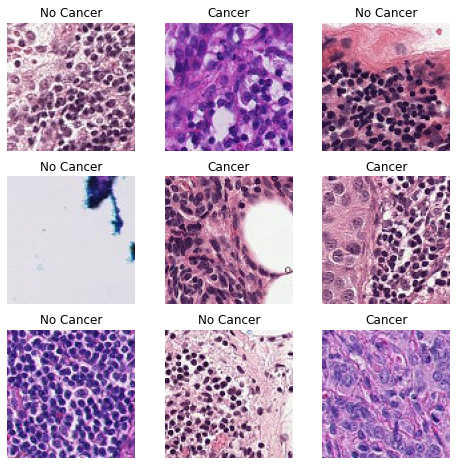

In [1]:
## 4b. Show some data
"""
    *Demonstrate that you have made at least some progress with getting your
     dataset ready to use. Load at least a few examples and visualize them
     as best you can*
"""

%pip install h5py

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


## loading training data eats up all avalable ram

# training_data = datasets.PCAM(
#     root="data",
#     split='train',
#     download=True,
#     transform=ToTensor()
# )

test_data = datasets.PCAM(
    root="data",
    split="test",
    download=True,
    transform=ToTensor()
)

labels = {
    1: "Cancer",
    0: "No Cancer"
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[sample_idx]
    img = img.permute(1, 2, 0)
    figure.add_subplot(rows, cols, i)
    plt.title(labels[label])
    plt.axis("off")
    plt.imshow(img)
plt.show()

## 5. Updated Methods

This is a binary image classification task. We will use two architectures, a CNN and a ResNet to generate feature vectors for the images. CNN are a type of neural network that is widely used for image analysis. It was popularized by AlexNet which won the 2012 ImageNet competition. Residual Networks were envisioned by Kaiming He from Microsoft Research in 2015. They use skip connections in their residual block which help in solving the vanishing gradient problem in deep CNNs. 
Since this is a standard binary classification task, we will use Binary Cross Entropy as our loss function. BCE performs best for these kinds of problems. We will use an appropriate train-validation-test split which will enable us to gauge the model’s ability to generalize to new data.


## 6. Previous Deliverables

*Copy the deliverables from your proposal and write a sentence saying whether you completed this goal, made progress on this goal, or abandoned this goal. Unless you completed the goal, give an explanation of how it went.*

### 6.1 Previous Essential Goals
- We will design a CNN and use it to generate feature vectors for the x-ray scans.
- We will then vary the output network between an RNN, LSTM and a fully connected feedforward neural network and benchmark the performances of all of them.


### 6.2 Previous Desired Goals
- Since a ResNet solves the vanishing gradient problem in deep CNNs, we will switch out the CNN for a ResNet(either design our own or use a pre-trained one) to generate the feature vectors.
-We will then vary the output network the same way we did with the CNN and benchmark the performance.


### 6.3 Previous Stretch Goals
- We will conduct a hyperparameter search for the best performing architecture combinations and see how changes in these parameters affect the performance, with the intention of improving performance even more.
-We will test our best performing architecture on a multi-class classification task to see whether it yields the same results.

In [ ]:
# 7. Results So Far
"""
  Include some initial empirical results on how your model(s) perform on your
  dataset(s). Ideally, you should not write all your code here, rather you
  should import from other code in your GitHub repository and just show some
  initial results. If it's easier, you can just include plots and a description
  of how you made them, rather than runnable code.
"""


## 8. New Deliverables

*For any deliverables that you did NOT complete, copy them into these lists below. Then add at least one goal per level.*

8.1 New Essential Goals
- Copy the old essential goals that you haven't yet completed.
- Provide at least one new goal you're sure you'll complete for the final report.

8.2 New Desired Goals
- Copy the old desired goals that you haven't yet completed.
- Provide at least one new goal you'd like to complete.

8.3 New Stretch Goal
- Copy the old stretch goals that you haven't yet completed.
- Provide at least one new goal that would be awesome to complete, but you might not have time.

## 9. Hopes and Concerns

*What's gone well so far? What's been the hardest thing?*

We got really bored of staring at pixelated hand-written digits for hours on end.

## 10. References

A. Krizhevsky, I. Sutskever, and G. E. Hinton, “ImageNet classification with deep convolutional Neural Networks,” Advances in Neural Information Processing Systems, 01-Jan-1970. [Online]. Available: https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf. 


K. He, X. Zhang, S. Ren, and J. Sun, “Deep Residual Learning for Image Recognition,” arXiv.org, Dec. 10, 2015.[Online]. Available:  https://arxiv.org/abs/1512.03385.